In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

titanic = pd.read_csv("C:\\Users\\Pranavi\\Documents\\sem-2\\Artificial Inntelligence\\train.csv")
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning
Removing passengerID

In [14]:
titanic=titanic.drop(['PassengerId', 'Ticket'], axis=1)
titanic[['LastName','FirstName']] = titanic.Name.str.split(',', expand=True)


Getting a column Title and removing all other Name columns

In [15]:
titanic[['Title','Name1','Other']] = titanic.FirstName.str.split(".", expand=True)

In [16]:
titanic=titanic.drop(['Name','LastName','FirstName','Name1','Other'], axis=1)


Making bins in title
1. Mr
2. Ms - has Miss, Mrs, Mme, Mlle
3. Master
4. Other - has the Countess, Sir, Rev, Major, Lady, Jonkheer, Dr, Don, Col, Capt

In [17]:
titanic.Title.replace(' Miss', ' Ms', inplace=True)
titanic.Title.replace(' Mrs', ' Mrs', inplace=True)
titanic.Title.replace(' Mme', ' Mrs', inplace=True)
titanic.Title.replace(' Mlle', ' Ms', inplace=True)
titanic.Title.replace(' the Countess', ' Other', inplace=True)
titanic.Title.replace(' Sir', ' Other', inplace=True)
titanic.Title.replace(' Rev', ' Other', inplace=True)
titanic.Title.replace(' Major', ' Other', inplace=True)
titanic.Title.replace(' Lady', ' Other', inplace=True)
titanic.Title.replace(' Jonkheer', ' Other', inplace=True)
titanic.Title.replace(' Dr', ' Other', inplace=True)
titanic.Title.replace(' Don', ' Other', inplace=True)
titanic.Title.replace(' Col', ' Other', inplace=True)
titanic.Title.replace(' Capt', ' Other', inplace=True)

Columns that have NaN values - Age, Cabin, Embarked (2 NaN)


In [18]:
total = titanic.isnull().sum().sort_values(ascending=False)
percent_1 = titanic.isnull().sum()/titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Title,0,0.0
Fare,0,0.0


Since Cabin has so many missinh values, it is removed/

In [19]:
titanic=titanic.drop(['Cabin'], axis=1)

Changing male to 1 and female to 0.

In [20]:
titanic.Sex.replace('male', 1, inplace=True)
titanic.Sex.replace('female', 0, inplace=True)

In Embarked, changing S to 1, C to 2, Q to 3

In [21]:
titanic.Embarked.replace('S', 1, inplace=True)
titanic.Embarked.replace('C', 2, inplace=True)
titanic.Embarked.replace('Q', 3, inplace=True)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,1.0,Mr
1,1,1,0,38.0,1,0,71.2833,2.0,Mrs
2,1,3,0,26.0,0,0,7.9250,1.0,Ms
3,1,1,0,35.0,1,0,53.1000,1.0,Mrs
4,0,3,1,35.0,0,0,8.0500,1.0,Mr
5,0,3,1,NaN,0,0,8.4583,3.0,Mr
6,0,1,1,54.0,0,0,51.8625,1.0,Mr
7,0,3,1,2.0,3,1,21.0750,1.0,Master
8,1,3,0,27.0,0,2,11.1333,1.0,Mrs
9,1,2,0,14.0,1,0,30.0708,2.0,Mrs


## Data Visualisation

Age and Sex

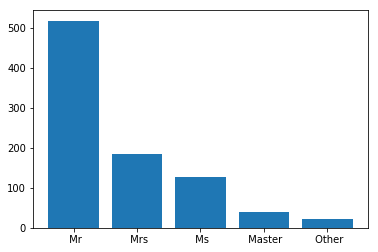

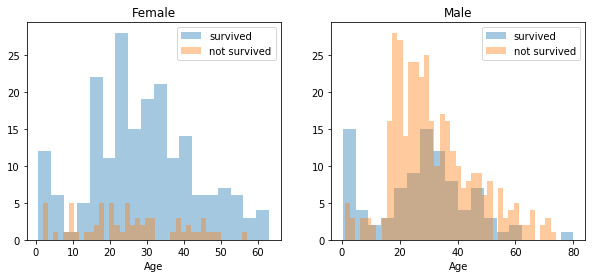

In [26]:
freq=titanic['Title'].value_counts()
freq
len_title = np.arange(len(titanic.Title))
uniq =titanic.Title.unique()
uniq
plt.bar(uniq,freq)
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic[titanic['Sex']==0]
men = titanic[titanic['Sex']==1]
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')



From the above, you can see that men have a high probability of survival when they are between 18 and 30 years old. This is only sometimes true for women. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

Embarked, Pclass and Sex:

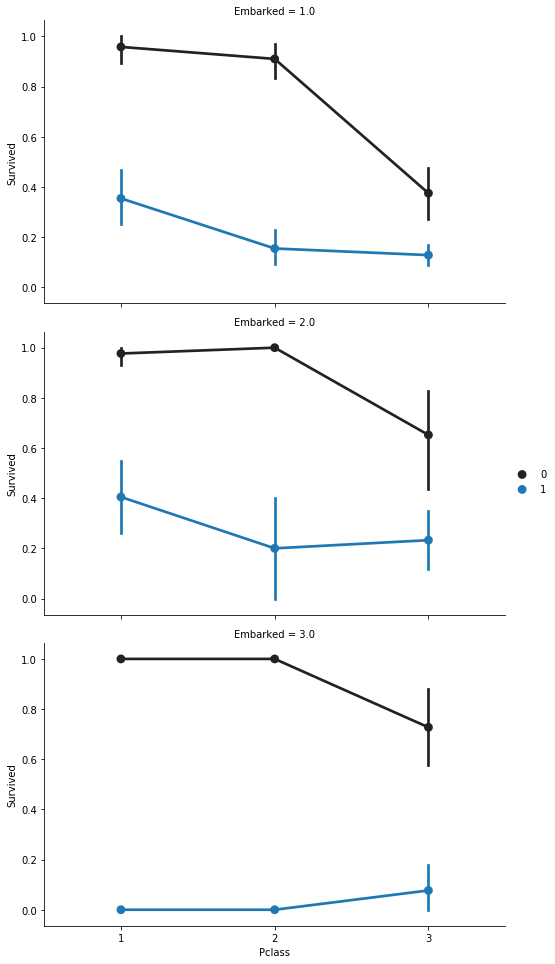

In [27]:
FacetGrid = sns.FacetGrid(titanic, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Embarked seems to be correlated with survival, depending on the gender.

Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

Pclass:

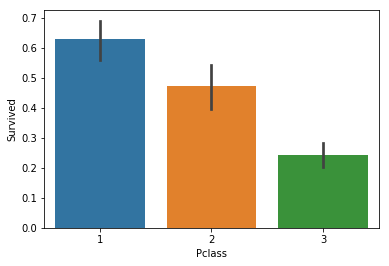

In [28]:
sns.barplot(x='Pclass', y='Survived', data=titanic)

Pclass is contributes to a persons chance of survival, especially if this person is in class 1.

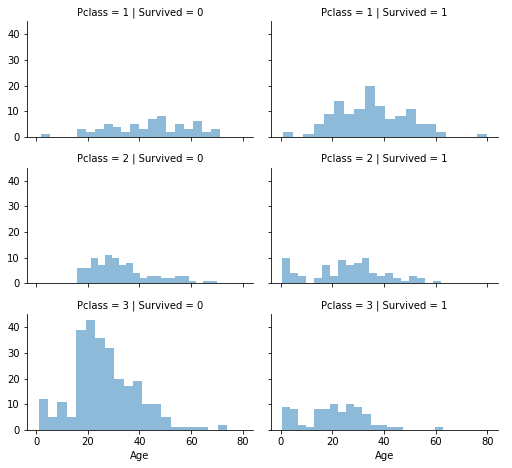

In [29]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

From the above, we can see that if Pclass if 3, the chance of survival is very low.

c:\users\pranavi\python\python36-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


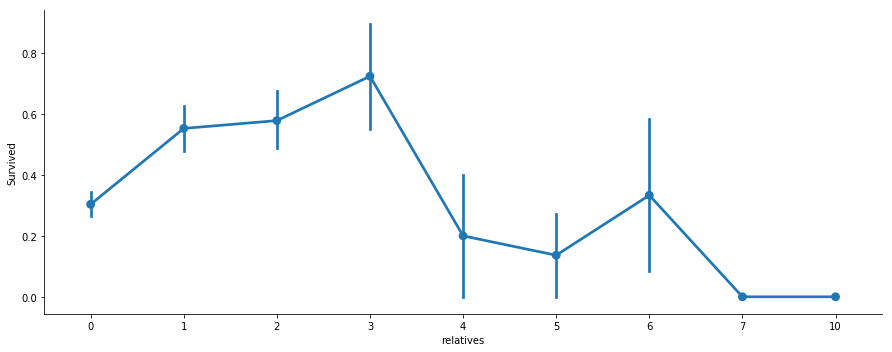

In [30]:
titanic['relatives'] = titanic['SibSp'] + titanic['Parch']
titanic.loc[titanic['relatives'] > 0, 'not_alone'] = 0
titanic.loc[titanic['relatives'] == 0, 'not_alone'] = 1
titanic['not_alone'] = titanic['not_alone'].astype(int)

axes = sns.factorplot('relatives','Survived', 
                      data=titanic, aspect = 2.5, )

From the above, we can see that there is a high probabilty of survival with 1 to 3 relatives, but a lower probability if you had less than 1 or more than 3 (except for some cases with 6 relatives).

# Estimating Age

In [31]:
mean = titanic["Age"].mean()
std = titanic["Age"].std()
is_null = titanic["Age"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
# fill NaN values in Age column with random values generated
age_slice = titanic["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
titanic["Age"] = age_slice
titanic["Age"] = titanic["Age"].astype(int)

# Estimating Embarked based on common value

In [32]:
common_value = 1
titanic['Embarked'] = titanic['Embarked'].fillna(common_value)
titanic.Embarked

0      1.0
1      2.0
2      1.0
3      1.0
4      1.0
5      3.0
6      1.0
7      1.0
8      1.0
9      2.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     3.0
17     1.0
18     1.0
19     2.0
20     1.0
21     1.0
22     3.0
23     1.0
24     1.0
25     1.0
26     2.0
27     1.0
28     3.0
29     1.0
      ... 
861    1.0
862    1.0
863    1.0
864    1.0
865    1.0
866    2.0
867    1.0
868    1.0
869    1.0
870    1.0
871    1.0
872    1.0
873    1.0
874    2.0
875    2.0
876    1.0
877    1.0
878    1.0
879    2.0
880    1.0
881    1.0
882    1.0
883    1.0
884    1.0
885    3.0
886    1.0
887    1.0
888    1.0
889    2.0
890    3.0
Name: Embarked, Length: 891, dtype: float64

# One-Hot Encoding

In [33]:
titanic
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Pclass_cat = le.fit_transform(titanic.Pclass)
Embarked_cat = le.fit_transform(titanic.Embarked)
Title_cat   = le.fit_transform(titanic.Title)


In [34]:
#initialize the encoded categorical columns
titanic['Pclass_cat'] = Pclass_cat
titanic['Embarked_cat'] = Embarked_cat
titanic['Title_cat'] = Title_cat


In [35]:
#drop the old categorical columns from dataframe
dummy_fields = ['Pclass', 'Embarked', 'Title']
titanic = titanic.drop(dummy_fields, axis = 1)

In [36]:
titanic = titanic.reindex_axis(['Survived', 'Pclass_cat', 'Title_cat', 'Sex',
                                    'Age', 'SibSp', 'Parch',
                                     'Fare', 'Embarked_cat'], axis= 1)

 
titanic.head(10)

c:\users\pranavi\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Survived,Pclass_cat,Title_cat,Sex,Age,SibSp,Parch,Fare,Embarked_cat
0,0,2,1,1,22,1,0,7.2500,0
1,1,0,2,0,38,1,0,71.2833,1
2,1,2,3,0,26,0,0,7.9250,0
3,1,0,2,0,35,1,0,53.1000,0
4,0,2,1,1,35,0,0,8.0500,0
5,0,2,1,1,18,0,0,8.4583,2
6,0,0,1,1,54,0,0,51.8625,0
7,0,2,0,1,2,3,1,21.0750,0
8,1,2,2,0,27,0,2,11.1333,0
9,1,1,2,0,14,1,0,30.0708,1


# Standardization of Data

In [37]:
num_features = ['Pclass_cat', 'Title_cat','Sex',
                                    'Age', 'SibSp', 'Parch',
                                     'Fare', 'Embarked_cat']
 
scaled_features = {}
for each in num_features:
    mean, std = titanic[each].mean(), titanic[each].std()
    scaled_features[each] = [mean, std]
    titanic.loc[:, each] = (titanic[each] - mean)/std

# Data Slicing

In [38]:
from sklearn.model_selection import train_test_split
features = titanic.values[:,1:8]
target = titanic.values[:,0]
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size = 0.33, random_state = 10)

# Gaussian Naive Bayes Implementation

In [136]:
gnb = GaussianNB()
gnb.fit(features_train, target_train)
target_pred = gnb.predict(features_test)

# Accuracy of Gaussian Navie Bayes

In [137]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, target_pred, normalize = True)


0.7864406779661017

# PCA and GaussianNB

In [96]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(features_train, target_train)
pred_test = unscaled_clf.predict(features_test)



In [156]:
# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB(var_smoothing = 0))
std_clf.fit(features_train, target_train)
pred_test_std = std_clf.predict(features_test)


In [157]:
from sklearn import metrics

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(target_test, pred_test_std)))




Prediction accuracy for the standardized test dataset with PCA
78.64%



In [158]:
# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']
# Show first principal components
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])




PC 1 without scaling:
 [-0.34141397  0.48689031 -0.52634772  0.05476326  0.22055129  0.32990948
  0.45700138]

PC 1 with scaling:
 [-0.33080996  0.53783154 -0.56264992  0.05520605  0.19787638  0.30222864
  0.38882149]


In [159]:
# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(features_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(features_train))



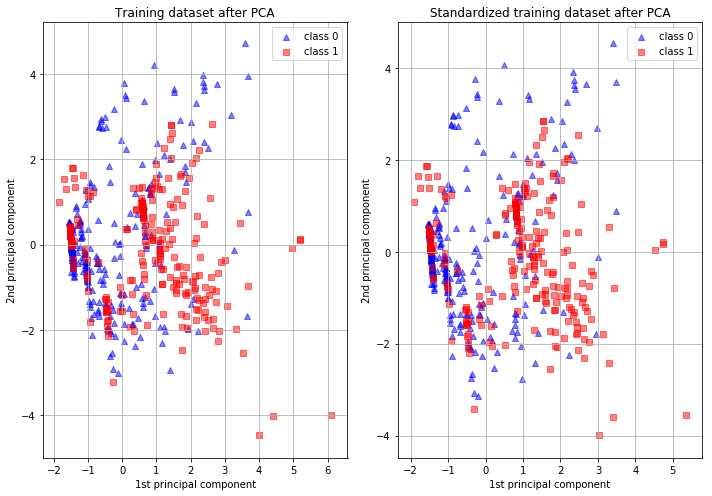

In [160]:
# visualize standardized vs. untouched dataset with PCA performed
FIG_SIZE = (10, 7)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax1.scatter(X_train_transformed[target_train == l, 0],
                X_train_transformed[target_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax2.scatter(X_train_std_transformed[target_train == l, 0],
                X_train_std_transformed[target_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

# Tuning Naive Bayes

In [161]:
gnb = GaussianNB(var_smoothing = 1)
gnb.fit(features_train, target_train)
target_pred = gnb.predict(features_test)
accuracy_score(target_test, target_pred, normalize = True)

0.8

In [186]:
from sklearn.model_selection import StratifiedKFold 

params = {}

#gridsearch searches for the best hyperparameters and keeps the classifier with the highest recall score
skf = StratifiedKFold(n_splits=10)

nb2 = GridSearchCV(GaussianNB(var_smoothing = 1), cv=skf, param_grid=params)


In [187]:
%time nb2.fit(features_train, target_train)


Wall time: 32.3 ms


c:\users\pranavi\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1), fit_params=None,
       iid='warn', n_jobs=None, param_grid={}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [184]:
y_pred_nb2 = nb2.predict(features_test) 


In [185]:
#print(y_pred_nb2)

# predicted probabilities on the test set
y_scores_nb2 = nb2.predict_proba(features_test)[:, 1]
accuracy_score(target_test,y_pred_nb2,normalize = True)

0.8